- Pobierz dane na temat przestępczości dla Chicago.
- Stwórz nowy projekt.
- Wczytaj dane do Pandas DataFrame.
- Wylistuj podstawowe informacje.
- Usuń wiersze z brakującymi wartościami.
- Zmień datę w danych na typ "Date"
- Podaj liczbę przestępstw per rok.
- Podaj trzy najczęstsze typy przestępstw.
- Stwórz wykresy dla: typów przestępstw, liczby przestępstw per rok.
- Użyj regresji liniowej dla predykcji kolejnych trzech lat przestępstw:
               liczby przestępstw
               najbardziej popularnych typów przestępstw

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('data/Crimes_-_2001_to_Present.csv')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [6]:
#Podstawowe informacje o tabeli.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [7]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.784664e+06,7.784664e+06,7.784617e+06,7.169816e+06,7.171188e+06,7.697816e+06,7.697816e+06,7.784664e+06,7.697816e+06,7.697816e+06
mean,7.026439e+06,1.185918e+03,1.129466e+01,2.275420e+01,3.748472e+01,1.164601e+06,1.885783e+06,2.009944e+03,4.184218e+01,-8.767149e+01
std,3.502657e+06,7.031335e+02,6.952422e+00,1.385106e+01,2.154115e+01,1.684658e+04,3.227531e+04,6.260628e+00,8.879598e-02,6.108257e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.792574e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152976e+06,1.859073e+06,2.005000e+03,4.176871e+01,-8.771367e+01
50%,7.029327e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166110e+06,1.890730e+06,2.009000e+03,4.185591e+01,-8.766584e+01
75%,1.013113e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176372e+06,1.909273e+06,2.015000e+03,4.190677e+01,-8.762819e+01
max,1.305643e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.023000e+03,4.202291e+01,-8.752453e+01


In [8]:
liczba_brakujących_wart = df.isnull().sum()
liczba_brakujących_wart


ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [9]:
liczba_brakujących_wart_razem = df.isnull().sum().sum()
liczba_brakujących_wart_razem

1672996

In [10]:
wiersze_bez_wart = df.isnull().any(axis=1)
wiersze_bez_wart.sum()

700229

In [11]:
#Usuwanie wierszy z brakującymi wartościami.
df_new = df.dropna()


In [12]:
df_new.reset_index(drop=True, inplace=True)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084435 entries, 0 to 7084434
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [14]:
#Zmiana typu danych w kolumnie data.
df_new['Date'] = pd.to_datetime(df_new['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_23484\1250731367.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['Date'] = pd.to_datetime(df_new['Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_23484\1250731367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084435 entries, 0 to 7084434
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [16]:
liczba_przestęplstw_na_rok = df_new.groupby('Year').size()
liczba_przestęplstw_na_rok

Year
2001      3888
2002    345026
2003    471995
2004    467132
2005    449868
2006    445499
2007    435532
2008    419794
2009    385849
2010    369805
2011    350905
2012    335099
2013    306325
2014    273610
2015    257788
2016    266482
2017    264156
2018    262835
2019    258161
2020    207439
2021    202246
2022    232552
2023     72449
dtype: int64

In [17]:
najczęstsze_typy_przestępstw = df_new['Primary Type'].value_counts().head(3)
najczęstsze_typy_przestępstw

Primary Type
THEFT              1499197
BATTERY            1299859
CRIMINAL DAMAGE     811905
Name: count, dtype: int64

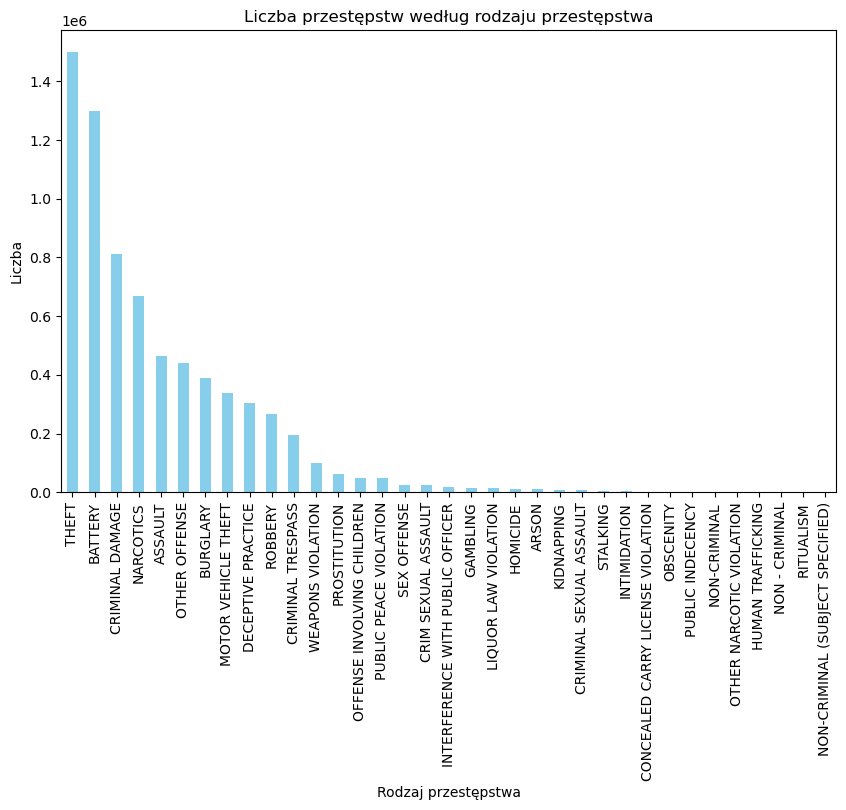

In [20]:
# Tworzenie wykresów.
typy_przestępstw = df_new['Primary Type'].value_counts()
plt.figure(figsize=(10, 6))
typy_przestępstw.plot(kind='bar', color='skyblue')
plt.title('Liczba przestępstw według rodzaju przestępstwa')
plt.xlabel('Rodzaj przestępstwa')
plt.ylabel('Liczba')
plt.xticks(rotation=90)
plt.show()

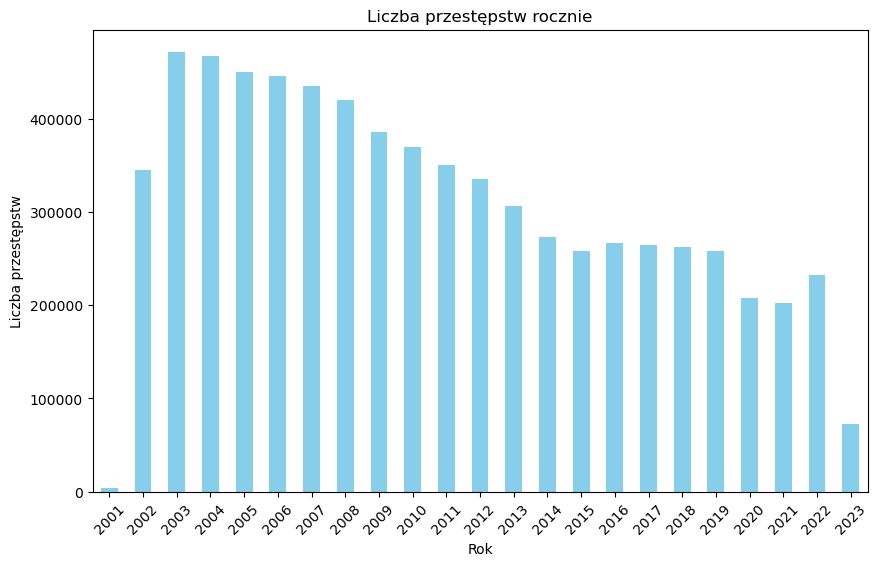

In [21]:
plt.figure(figsize=(10, 6))
liczba_przestęplstw_na_rok.plot(kind='bar', color='skyblue')
plt.title('Liczba przestępstw rocznie')
plt.xlabel('Rok')
plt.ylabel('Liczba przestępstw')
plt.xticks(rotation=45)
plt.show()

In [47]:
#Regresja liniowa.
df1 = liczba_przestęplstw_na_rok.reset_index(name='Count')
df1.columns = ['Rok', 'Liczba_przestępstw']
df1

,Rok,Liczba_przestępstw
0,2001,3888
1,2002,345026
2,2003,471995
3,2004,467132
4,2005,449868
5,2006,445499
6,2007,435532
7,2008,419794
8,2009,385849
9,2010,369805


In [50]:
X = df1[['Rok']]
y = df1['Liczba_przestępstw']

In [52]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [53]:
kolejne_lata = np.array([[2024], [2025], [2026]])
predictions = model.predict(kolejne_lata)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
for year, pred in zip(kolejne_lata.flatten(), predictions):
    print(f'Przewidywana liczba przestępstw w {year}: {pred}')

Przewidywana liczba przestępstw w 2024: 196496.36758892983
Przewidywana liczba przestępstw w 2025: 187202.82213438675
Przewidywana liczba przestępstw w 2026: 177909.27667983994


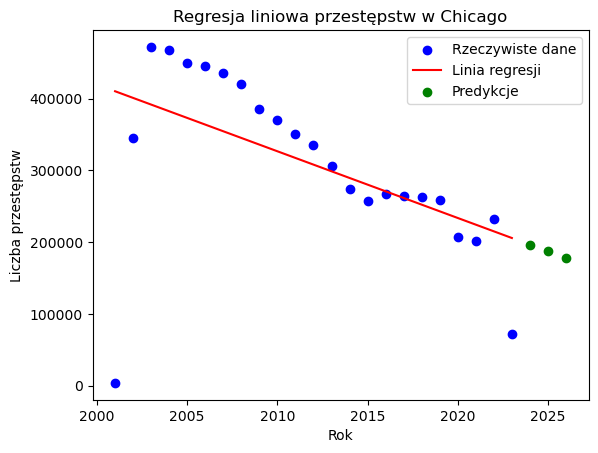

In [57]:
plt.scatter(X, y, color='blue', label='Rzeczywiste dane')
plt.plot(X, model.predict(X), color='red', label='Linia regresji')
plt.scatter(kolejne_lata, predictions, color='green', label='Predykcje')
plt.xlabel('Rok')
plt.ylabel('Liczba przestępstw')
plt.title('Regresja liniowa przestępstw w Chicago')
plt.legend()
plt.show()

In [62]:
Liczba_przestępstw_lata = df_new.groupby(['Year', 'Primary Type']).size().reset_index(name='Suma przestępstw')
Liczba_przestępstw_lata

,Year,Primary Type,Suma przestępstw
0,2001,ARSON,4
1,2001,ASSAULT,46
2,2001,BATTERY,151
3,2001,BURGLARY,50
4,2001,CRIM SEXUAL ASSAULT,128
...,...,...,...
704,2023,ROBBERY,2649
705,2023,SEX OFFENSE,359
706,2023,STALKING,132
707,2023,THEFT,15042


In [63]:
df2 = Liczba_przestępstw_lata.pivot(index='Year', columns='Primary Type', values='Suma przestępstw').fillna(0).astype(int)
df2

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2001,4,46,151,50,0,128,76,5,11,394,...,183,10,0,5,0,51,104,0,1232,7
2002,682,22757,67920,18924,0,1284,39621,16,9497,10000,...,22154,4205,5,1722,2,13159,1590,137,71727,2902
2003,953,29290,87828,25007,0,1511,54692,23,14686,13254,...,30910,6161,6,2416,2,17235,1995,245,97796,4198
2004,774,28782,86949,24517,0,1434,53066,32,15834,13077,...,29452,7468,9,2490,1,15949,1722,214,94635,4284
2005,688,26958,83616,25413,0,1399,54349,23,16567,13153,...,27828,6097,4,2717,1,15987,1707,190,84298,4072
2006,726,25922,80550,24302,0,1342,57071,28,14488,13266,...,27045,6955,4,3062,7,15942,1505,185,85226,3816
2007,710,26296,79542,24825,0,1430,53681,29,13681,13860,...,26817,6083,5,3312,1,15443,1478,211,84557,3546
2008,642,25257,75425,25994,0,1391,52162,21,12212,14266,...,26108,5088,4,2991,0,16585,1387,185,86342,3823
2009,612,22596,67717,26483,0,1280,47230,24,10743,13272,...,25236,3900,10,3120,0,15840,1165,162,79249,4077


In [76]:
def perform_regression(crime_type):
    X = np.array(df2.index).reshape(-1, 1)
    y = df2[crime_type].values
    model1 = LinearRegression()
    model1.fit(X, y)
    predictions1 = model1.predict(kolejne_lata)
    for year, pred in zip(kolejne_lata.flatten(), predictions1):
        print(f'Przewidywana liczba przestępstw w {year}: {pred}')
    plt.figure()
    plt.scatter(X, y, color='blue', label='Rzeczywiste dane')
    plt.plot(X, model1.predict(X), color='red', label='Linia regresji')
    plt.scatter(kolejne_lata, predictions1, color='green', label='Predykcje')
    plt.xlabel('Rok')
    plt.ylabel('Liczba przestępstw')
    plt.title(f'Regresja liniowa dla {crime_type}')
    plt.legend()
    plt.show()


Przewidywana liczba przestępstw w 2024: 46334.48616600782
Przewidywana liczba przestępstw w 2025: 44763.820158103015
Przewidywana liczba przestępstw w 2026: 43193.15415019775


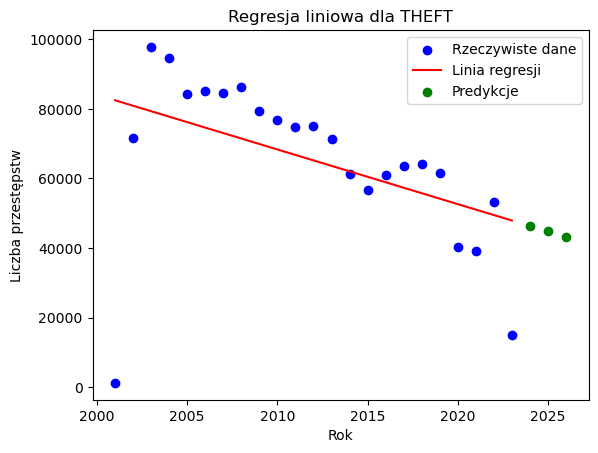

Przewidywana liczba przestępstw w 2024: 36296.03557312256
Przewidywana liczba przestępstw w 2025: 34611.071146245115
Przewidywana liczba przestępstw w 2026: 32926.10671936767


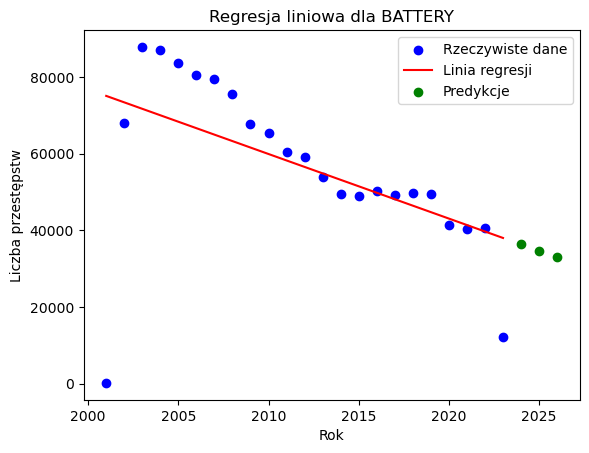

Przewidywana liczba przestępstw w 2024: 21084.023715415038
Przewidywana liczba przestępstw w 2025: 19899.340909090824
Przewidywana liczba przestępstw w 2026: 18714.65810276661


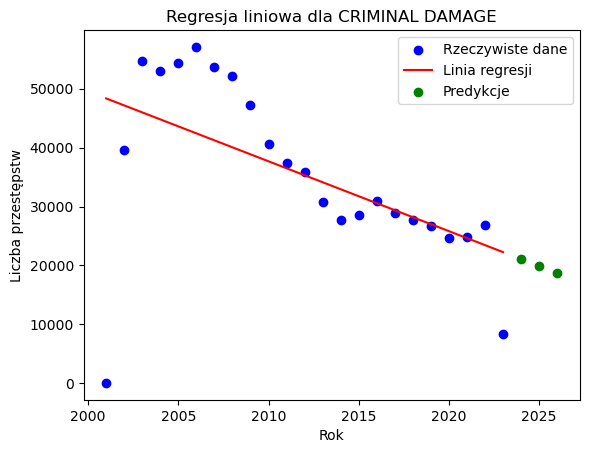

In [77]:
najczęstsze_przestępstwa = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']
for crime_type in najczęstsze_przestępstwa:
    perform_regression(crime_type)